In [1]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_32440\2346803613.py:17: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_gate = QFT(num_qubits=5, do_swaps=True, inverse=False, name="QFT")


QFT Circuit (State 10101 -> Superposition):


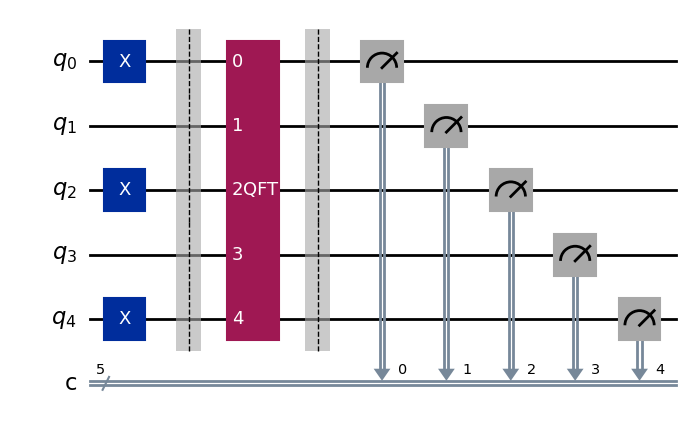

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_32440\2346803613.py:41: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft_gate = QFT(num_qubits=5, do_swaps=True, inverse=True, name="IQFT")



QFT + Inverse QFT Circuit (State 10101 -> Superposition -> 10101):


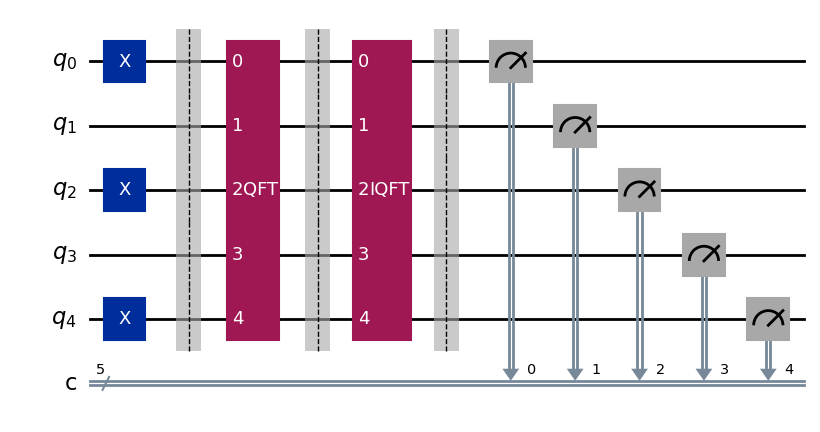


--- Simulation Results ---


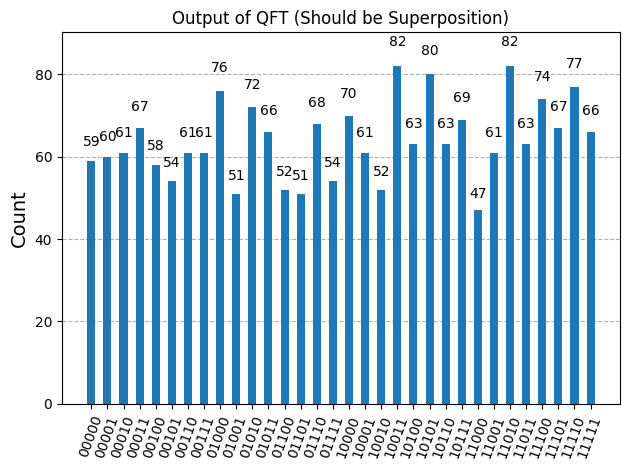

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram, circuit_drawer

# --- Part 1: QFT (As you did) ---

circuit_qft = QuantumCircuit(5, 5)

# Initialize the state to 10101 [cite: 1998-2000]
# Note: Qiskit orders qubits q4,q3,q2,q1,q0
# So 10101 corresponds to X on q0, q2, q4
circuit_qft.x([0, 2, 4])
circuit_qft.barrier()

# Apply the 5-qubit QFT [cite: 1981-1982]
qft_gate = QFT(num_qubits=5, do_swaps=True, inverse=False, name="QFT")
circuit_qft.append(qft_gate, range(5))
circuit_qft.barrier()

# Measure the QFT output
circuit_qft.measure(range(5), range(5))

print("QFT Circuit (State 10101 -> Superposition):")
display(circuit_drawer(circuit_qft, output="mpl"))

# --- Part 2: Inverse QFT (Missing Part) ---

circuit_iqft = QuantumCircuit(5, 5)

# Initialize the state to 10101 (same as before) [cite: 1998-2000]
circuit_iqft.x([0, 2, 4])
circuit_iqft.barrier()

# Apply the 5-qubit QFT
circuit_iqft.append(qft_gate, range(5))
circuit_iqft.barrier()

# *** ADDED: Apply the Inverse QFT *** [cite: 1974-1978]
# This should reverse the QFT and return the state to 10101
iqft_gate = QFT(num_qubits=5, do_swaps=True, inverse=True, name="IQFT")
circuit_iqft.append(iqft_gate, range(5))
circuit_iqft.barrier()

# Measure the final state
circuit_iqft.measure(range(5), range(5))

print("\nQFT + Inverse QFT Circuit (State 10101 -> Superposition -> 10101):")
display(circuit_drawer(circuit_iqft, output="mpl"))


# --- Simulation ---
backend = AerSimulator()
shots = 2048

# Run QFT-only circuit
compiled_qft = transpile(circuit_qft, backend)
counts_qft = backend.run(compiled_qft, shots=shots).result().get_counts()

# Run QFT + IQFT circuit
compiled_iqft = transpile(circuit_iqft, backend)
counts_iqft = backend.run(compiled_iqft, shots=shots).result().get_counts()

# Plot histograms
print("\n--- Simulation Results ---")
plot_histogram(counts_qft, title="Output of QFT (Should be Superposition)")